In [ ]:
# !pip install konlpy
# !pip install -U gensim

In [ ]:
# pip install googletrans==4.0.0-rc1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from konlpy.tag import Okt, Kkma
from collections import Counter
from matplotlib import font_manager,rc
from googletrans import Translator
# font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
# rc('font', family=font_name)
import networkx as nx
from wordcloud import WordCloud
import time

In [166]:
csv  = pd.read_csv('./data/인천/인천차이나타운.csv')

In [167]:
# 후기 텍스트
# 이모지가 있을 경우 이모지 제외하고 나머지만 추출하기
def txt_without_emoji(df):
    contents = list(df['후기'])
    contents =  ' '.join(str(item) for item in contents)
    contents = re.sub(r'\bnan\b', '',contents)
    cleaned_text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', contents)
    return cleaned_text
reviews = txt_without_emoji(csv)
reviews

'    거리가 길진 않아서 금방 둘러봄\n또 갈지는 잘 모르겠음 오래 된 화교 요리사들의 중식 먹을 수 있어요\n 동네 중국집 맛 기대하고 가면 좀 심심할 수 있는데 각 요리 재료 맛을 더 잘 느낄 수 있어요 북적이는 차이나타운도 좋지만 골목골목 다니는거도 재미납니다 작지만 이쁜 카페들도 많고 4월초 벚꽃 시즌 걸어다니면 너무 행복합니다   차이나타운구경하고 자장면한그릇하고  나들이 좋아요 월미도 가까워요  짜장면과 찹쌀탕수육 먹으러 올만 함 헌데 주차가 쉽지않고 주말이면 사람이 꽤 많음 인천역 바로 앞이라 전철로 접근가능해요 구경 할 곳도 많고 음식도 맛있어요 타이완타운이 왜 삭제 대상이냐 오르막길이 생각보다 많아서 오래 걷기는 힘듬   짜장면을 먹을 수 있어서 좋았다   202434첫방문\n아주 아주 좋아요 좋아요 딱히 특별한건 없는데 사람이 너무 많다\n주차 공간 매우 부족 주말에 음식 드시러가는 것은 비추\n도로  식당 앞은 인산인해입니다\n단 뷰가 먼저인 분들께는 강추\n식사하시려면 \n한적한 평일을 추천합니다\n주말에는 1100  한적한 시간없이 사람들이 무척많으니 참고하세요    나들이 골목골목 구경꺼리들이 좀 있고\n산책하기 좋은 산길도 있어 가족과 즐거운 시간보냈네요   나들이 포토존 멀지만 않다면 또 가보고 싶어요  수학여행으로 한 번 가고 가족여행으로 한 번 더 갔는데 너무 좋았고 짜장면집과 탕후루가 널려있고 가족여행이나 친구랑 함께 가도 좋은 것 같아요 생각보다 음식들이 엄청 맛있다거나 하진않고 멀어서 그냥 한 번쯤 가볼만하지 또 갈 것 같지는 않아요 원피스 카페랑 맥아더 동상 공원 매인거리 딱 그정도\n특히 겨울엔 길거리에 구경할것도 딱히 없고 뭐 그럼\n아무래도 블로거들은 포장을 잘 하는듯  인천시민으로서 오히려 점차 특색이 사라지는 것 같아 슬프다     나들이  오랜만에 재미있었어요      주차는 헬인데 재밌는 곳 인청 차이나 타운 볼거리 먹거리 많은곳 중국풍 건물들이 즐비하긴 한데 중국인은 잘 안 보여요 중식집 탕후루집 등 음

In [168]:
# 영어 텍스트 후기만 따로 뽑기
# 영어 후기는 양이 적으니까 그대로 제공해도 좋을 것 같음.
def eng_txt(df):
    all_contents = list(df['후기'])
    all_contents =  ' '.join(str(item) for item in all_contents)
    all_contents = re.sub(r'\bnan\b', '', all_contents)
    english_text = re.sub('[^a-zA-Z\s]', '',all_contents)
    english_text = re.sub(r'\n', '', english_text)
    return english_text
eng_texts = eng_txt(csv)
eng_texts

'                                                                                                                                                                                                                                                                                                                                        A very interesting place                                                                                                                                                        st                                                                                                                                       Taiwan No                  TAIWAN NO                                                           jin                                                                                                                                     NOCHINA                                                                                                                        

In [169]:
# 형용사 바이그램 만들기
def adj_bigram(texts):
    okt=Okt()
    tokens = [word for word, pos in okt.pos(texts) if pos == 'Adjective']
    bigrams = [(tokens[i], tokens[i+1]) for i in range(len(tokens)-1)]
    top_bigrams = list(Counter(bigrams))

    # 단어길이 하나이상인 것만 뽑기 (곳, 것 등등 제외)
    kor_bigrams = [bigram for bigram in top_bigrams if len(bigram[0]) > 1 and len(bigram[1]) > 1]
    return kor_bigrams
kor_bigrams = adj_bigram(reviews)
kor_bigrams

[('길진', '있어요'),
 ('있어요', '기대하고'),
 ('기대하고', '심심할'),
 ('심심할', '있는데'),
 ('있는데', '있어요'),
 ('있어요', '좋지만'),
 ('좋지만', '이쁜'),
 ('이쁜', '많고'),
 ('많고', '행복합니다'),
 ('행복합니다', '좋아요'),
 ('좋아요', '가까워요'),
 ('가까워요', '많음'),
 ('많음', '가능해요'),
 ('가능해요', '많고'),
 ('많고', '맛있어요'),
 ('맛있어요', '많아서'),
 ('많아서', '힘듬'),
 ('힘듬', '있어서'),
 ('있어서', '좋았다'),
 ('좋았다', '좋아요'),
 ('좋아요', '좋아요'),
 ('좋아요', '딱히'),
 ('딱히', '특별한건'),
 ('특별한건', '없는데'),
 ('없는데', '많다'),
 ('많다', '입니다'),
 ('입니다', '한적한'),
 ('한적한', '한적한'),
 ('한적한', '많으니'),
 ('많으니', '있고'),
 ('있고', '좋은'),
 ('좋은', '있어'),
 ('있어', '즐거운'),
 ('즐거운', '멀지만'),
 ('멀지만', '좋았고'),
 ('좋았고', '있고'),
 ('좋은', '같아요'),
 ('같아요', '맛있다거나'),
 ('맛있다거나', '멀어서'),
 ('멀어서', '같지는'),
 ('같지는', '딱히'),
 ('딱히', '없고'),
 ('없고', '그럼'),
 ('그럼', '같아'),
 ('같아', '슬프다'),
 ('슬프다', '재미있었어요'),
 ('재미있었어요', '재밌는'),
 ('재밌는', '많은'),
 ('많은', '즐비하긴'),
 ('즐비하긴', '많고'),
 ('많고', '있습니다'),
 ('있습니다', '불편하신'),
 ('불편하신', '입니다'),
 ('입니다', '없습니다'),
 ('없습니다', '없고'),
 ('없고', '그럽니다'),
 ('그럽니다', '가까운'),
 ('가까운', '맛있는'),
 ('맛있는', '있어서'),


In [170]:
# Positive and Negative Word List.xlsx' 파일 불러오기
# from google.colab import files
# uploaded = files.upload()

# 긍정,부정 리스트 불러오기
adj_list = pd.read_excel('./data/Positive and Negative Word List.xlsx', )
# 결측치 처리
adj_list.dropna(axis=0, inplace=True)

# 긍/부정 리스트 만들기
# 출처 만들기
negative_words = list(adj_list['Negative Sense Word List'])
positive_words = list(adj_list['Positive Sense Word List'])

In [171]:
# 영어 바이그램 만드는 함수
def bigram(kor_bigram):
    top_bigrams = Counter(kor_bigram)
    tokens_df = pd.DataFrame(pd.Series(top_bigrams), columns=['Freq'])
    sorted_df = tokens_df.sort_values(by='Freq', ascending=False)
    # 인덱스를 ,로 이어서 바이그램으로 만들기
    sorted_df.index = [','.join(map(str, idx)) for idx in sorted_df.index]
    # 영어로 번역
    time.sleep(1)
    translator = Translator()
    # trans_text는 ["Because it's a lot, it's comfortable",'Beautiful, good',...] 이런 형태로 나옴
    trans_text = [translator.translate(i, dest='en').text for i in sorted_df.index]
    # 소문자 변환
    lowercase_list = [text.lower() for text in trans_text]
    # tuple_list는 [("because it's a lot", "it's comfortable"),('beautiful', 'good'),...] 이런 형태로 만듬
    tuple_list = [tuple(sentence.split(', ')) for sentence in lowercase_list]
    # 튜플 안에 두개의 요소 모두 있는 것만 뽑기 ('good',) 이런 것들은 제외하기
    tuple_list = [tpl for tpl in tuple_list if len(tpl) > 1]
    return tuple_list


# 임의의 바이그램 리스트
total_bigrams = len(kor_bigrams)

# 배치 크기 설정
batch_size = min(200, total_bigrams)  # 200개 또는 전체 바이그램 개수 중 작은 값을 배치 크기로 설정

# 나누어서 실행
combined_list = []  # 모든 바이그램을 합칠 리스트

for start_idx in range(0, total_bigrams, batch_size):
    end_idx = min(start_idx + batch_size, total_bigrams)
    batch_bigrams = kor_bigrams[start_idx:end_idx]

    # 바이그램 함수 실행
    tuple_list = bigram(batch_bigrams)

    # 모든 바이그램을 하나의 리스트로 합치기
    combined_list.extend(tuple_list)

print(combined_list)

[('giljin', 'i have'), ('clean', 'good'), ('no', 'good'), ('good', 'honestly'), ('honestly', 'nothing'), ('none', 'many'), ('various', 'full'), ('a lot', 'clean'), ('good', 'delicious'), ('it was bright', 'good'), ('there are many delicious', 'many'), ('many', 'no'), ('no', 'unkind'), ('similar', 'nothing'), ('no', 'no'), ('that is', 'not'), ("it's okay", 'not'), ('no', 'it was'), ('there is', 'looking forward to'), ('it was the same', 'it was the same'), ('many', 'ya'), ('need', 'no'), ('so', 'not'), ('no', 'low'), ('low', 'good'), ('good', 'but not'), ('no', 'the same'), ('it was the same', 'because it was kind'), ('you are kind', 'no'), ('no', 'no'), ('no', 'no'), ('without', 'nothing'), ('nothing', 'just'), ('good', 'good'), ('it would be nice', 'it looks like'), ('no', 'beauty'), ('beauty', 'delicious'), ('no', 'delicious'), ('delicious', 'delicious'), ('it was delicious', 'there was'), ('it was', 'it was delicious'), ('is', 'no'), ('without it', 'it will be delicious'), ('there',

In [172]:
print(len(combined_list))

141


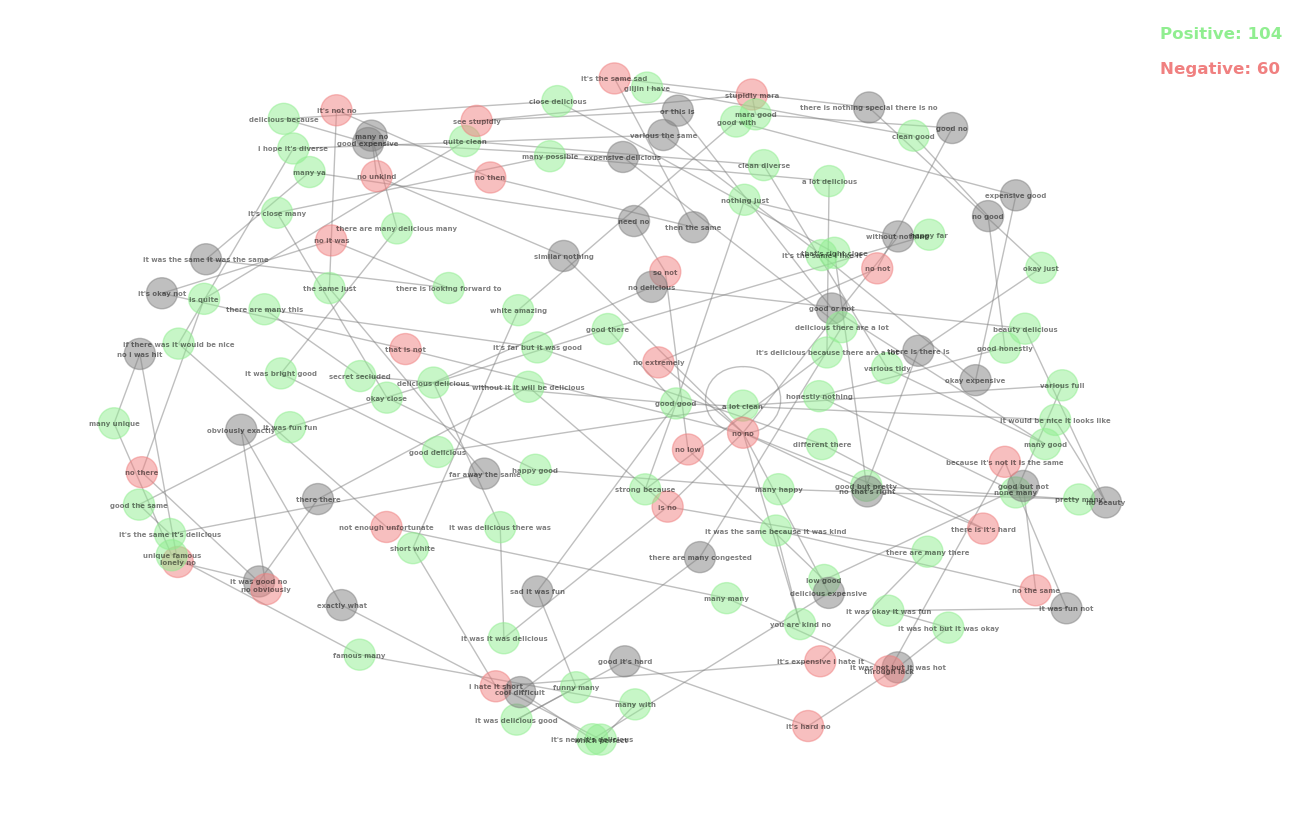

In [173]:
def visualize_bigram_network(combined_list, positive_words, negative_words, spot):
    # 네트워크 그래프 생성
    G = nx.Graph()

    # 바이그램을 그래프에 추가
    for i in range(len(combined_list) - 1):
        bigram1 = combined_list[i]
        bigram2 = combined_list[i + 1]
        G.add_edge(' '.join(bigram1), ' '.join(bigram2))

    # 레이아웃 정의
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # 그래프 시각화
    plt.figure(figsize=(12, 8))

    # 노드 색상 설정
    node_colors = []
    for node in G.nodes():
        # 노드의 텍스트를 단어로 분리하여 각 단어가 positive_words 또는 negative_words에 있는지 확인
        words = node.split()
        positive_count = sum(word in positive_words for word in words)
        negative_count = sum(word in negative_words for word in words)

        # 긍정적인 단어가 더 많으면 lightgreen, 부정적인 단어가 더 많으면 lightcoral, 동일하면 gray
        if positive_count > negative_count:
            node_colors.append('lightgreen')
        elif negative_count > positive_count:
            node_colors.append('lightcoral')
        else:
            node_colors.append('gray')  # 긍정과 부정이 동일한 경우는 gray 색상을 사용

    # 네트워크 그래프 그리기
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=5, font_weight='bold', edge_color='gray', linewidths=1, alpha=0.5)

    # 노드 레이블 위치 조정
    label_pos = {k: (v[0], v[1] - 0.05) for k, v in pos.items()}

    # 긍정, 부정 단어 개수 계산
    positive_total = sum(any(word in positive_words for word in node.split()) for node in G.nodes())
    negative_total = sum(any(word in negative_words for word in node.split()) for node in G.nodes())
    neutral_total = len(tuple_list) - positive_total - negative_total

    # 긍정, 부정 레이블 추가
    plt.text(1, 1, f'Positive: {positive_total}', color='lightgreen', fontsize=12, fontweight='bold')
    plt.text(1, 0.9, f'Negative: {negative_total}', color='lightcoral', fontsize=12, fontweight='bold')

    # 중립 레이블이 0보다 큰 경우에만 추가
    if neutral_total > 0:
        plt.text(1, 0.8, f'Neutral: {neutral_total}', color='gray', fontsize=12, fontweight='bold')

    # 그래프 제목 설정
    #plt.title('Bigram Network Graph')
    plt.savefig(f'./data/img/{spot}그래프.png', bbox_inches='tight')
    # 그래프 출력
    plt.show()
# 그래프 만드는 함수 실행
visualize_bigram_network(combined_list, positive_words, negative_words, '인천차이나타운')